In [1]:

import pandas as pd
import numpy as np
import numpy as np
import mglearn
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 나눔 폰트를 사용합니다.
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 1.목적 : SVM을 가지고 iris 데이터 분류하기
### 2.데이터 수집

In [2]:
df = load_iris()

df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
x = df.data
y = df.target

X = pd.DataFrame(x, columns=df['feature_names'])
y = pd.DataFrame(y, columns=['species'])
# X.head(2)
# y.head(2)

print(X.shape, y.shape)

(150, 4) (150, 1)


### 3.데이터 전처리
- 스케일링
- 레이블 인코딩

In [4]:
# 스케일링
# Min-Max Scaler
transformer = MinMaxScaler()
transformer.fit(x)

MinMaxScaler()

In [5]:
X_data = transformer.transform(X)
X_data

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [6]:
# 레이블 인코딩
le = LabelEncoder()
le.fit(y)
print(le.classes_)

[0 1 2]


c:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
y_data = le.transform(y)

c:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# 훈련, 평가 데이터 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    random_state = 0,
                                                    stratify = y_data)


### 4.탐색적 데이터분석(EDA) - 클래스별 비율, 시각화

### 5.모델 선택

In [9]:
model = SVC(kernel='rbf', C=1.0 , gamma='auto', probability=True)

### 6.모델 학습

In [10]:
model.fit(X_train, y_train)

SVC(gamma='auto', probability=True)

### 7.모델 평가

In [11]:
print(model.score(X_train ,y_train))
print(model.score(X_test ,y_test))

0.9464285714285714
0.9736842105263158


새로운 데이터 넣어서 예측하기

In [12]:
labels = ['세토사', '버시칼라', '버지니카']

import random

new_test = []
add = []
for a in range(4):
    num = random.random()
    add.append(num)
new_test.append(add)
    
print(new_test)

[[0.598792865079367, 0.4559625247856003, 0.693787774688091, 0.7284289055931108]]


In [13]:
y_predict = model.predict(new_test)

In [14]:
label = [y_predict[0]]

In [15]:
print(label)

[2]


# 2번째 실습

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

## SVC - 분류, linear

In [17]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [18]:
cancer_data = pd.DataFrame(cancer['data'], columns=cancer['feature_names']).to_numpy()
cancer_target = pd.DataFrame(cancer['target'], columns=['n/p']).to_numpy()

print(cancer_data.shape, cancer_target.shape)

(569, 30) (569, 1)


In [19]:
# 스케일링
scaler = StandardScaler()
scaler.fit(cancer_data)
x_scaled = scaler.transform(cancer_data)
x_scaled.shape
x_scaled
# cancer_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [58]:
# 학습, 테스트 셋 분류하기
X_train, X_test, y_train, y_test = train_test_split(x_scaled, cancer_target,
                                                    test_size = 0.3,
                                                    random_state=1234)
# 커널이 linear 인 SVC모델 선언하기
svc = SVC(kernel='linear', C=1.0, gamma='auto', random_state=0)


In [22]:
# 교차 검증 - 가지고 데이터셋을 쪼개서 여러번 학습
score = cross_val_score(svc, x_scaled, cancer_target, cv=5)

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [56]:
print(score)
print('교차 검증 평균 : ', np.mean(score))

[0.98333333 0.96666667 1.         0.95       0.96666667]
교차 검증 평균 :  0.9733333333333334


### __(오후 수업)__

### 비선형데이터인 경우 poly로 고차원에서 다루기
### 분류 - SVC

In [25]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

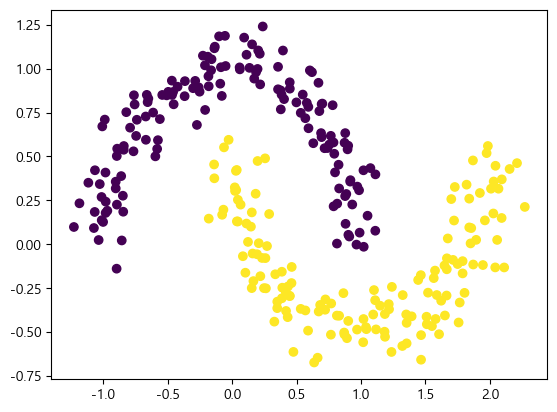

In [60]:
# 데이터 불러오기
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# 데이터의 양상을 보자
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [61]:
# 데이터 나누기(학습, 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# polynomal SVC모델 선언
svm = SVC(kernel='poly', C=1.0 , gamma='auto', random_state=0)

# 교차 검증을 통해서 확인하기
score = cross_val_score(svm, X, y, cv=5)
print("교차 검증 평균 : ", score.mean())

교차 검증 평균 :  0.9


### 비선형데이터인 경우 rbf(가우시안)로 고차원에서 다루기
### 분류 - SVC
- rbf가 poly보다 더 높은 정확도를 가진다는 것을 알 수 있다.

In [64]:
# 가우시안 함수 적용
svm_1 = SVC(kernel='rbf', C=1.0, gamma = 'auto', random_state=0)

# 교차 검증
score = cross_val_score(svm_1, X, y, cv=5)
print(score)
print('교차 검증 평균 :', score.mean())


[0.98333333 0.96666667 1.         0.95       0.96666667]
교차 검증 평균 : 0.9733333333333334


## 회귀 - SVR
## kernel : linear

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston, make_regression
from sklearn.svm import SVR

In [66]:
boston = load_boston()

X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = boston.target
print(X.shape, y.shape, "\n")
print(X.head(2), "\n")
# print(y)

(506, 13) (506,) 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  
0     15.3  396.9   4.98  
1     17.8  396.9   9.14   



In [33]:
# 데이터 나누고 데이터를 학습하기 전에 
# 단위를 통일하는 scaler 작업을 한다.

scaler = MinMaxScaler()
# 학습과 스케일을 동시에 함
X_scaled = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    random_state = 1)

In [35]:
svr = SVR(kernel='linear', C=1, gamma='auto')
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

print('가중치 : ', svr.coef_, "\n")
print('절편 : ', svr.intercept_)

가중치 :  [[ -3.3636531    2.81188013  -0.29919187   2.58278058  -3.77253098
    9.90460566  -2.35177935  -5.36243188   0.82403199  -2.50204455
   -6.84633163   2.71240441 -10.6205051 ]] 

절편 :  [25.64825943]


In [36]:
y_test


array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4, 25.3, 23.3,  7.2, 21.2, 11.7, 27. , 29.6, 26.5,
       43.5, 23.6, 11. , 33.4, 36. , 36.4, 19. , 20.2, 34.9, 50. , 19.3,
       14.9, 26.6, 19.9, 24.8, 21.2, 23.9])

In [37]:
MSE = np.mean(np.square(y_test-pred))

print("MSE : ", MSE)


MSE :  38.66107271129924


In [38]:
rmse = mean_squared_error(y_test, pred)**0.5
print("rmse :", rmse)

rmse : 6.21780288456455


In [39]:
rmse = mean_squared_error(y_test, pred, squared=False)
print('rmse :', rmse)

rmse : 6.21780288456455


In [40]:
# r_2(R스퀘어) 값을 출력(.score())
svr.score(X_test, y_test)

0.6097146329528931

In [41]:
svr = SVR(kernel='poly', C=1, gamma='auto')
svr.fit(X_train, y_train)

SVR(C=1, gamma='auto', kernel='poly')

In [42]:
pred = svr.predict(X_test)
print("MSE : ",  mean_squared_error(y_test, pred))
print("rmse1 : ", mean_squared_error(y_test, pred)**0.5)
print("rmse2 : ", mean_squared_error(y_test, pred, squared=False))

MSE :  92.40251120741866
rmse1 :  9.612622493753651
rmse2 :  9.612622493753651


## 회귀 - 가우시안

score :  0.06719225635656545
MSE :  66.57695263166818
rmse1 :  8.159470119540128
rmse2 :  8.159470119540128


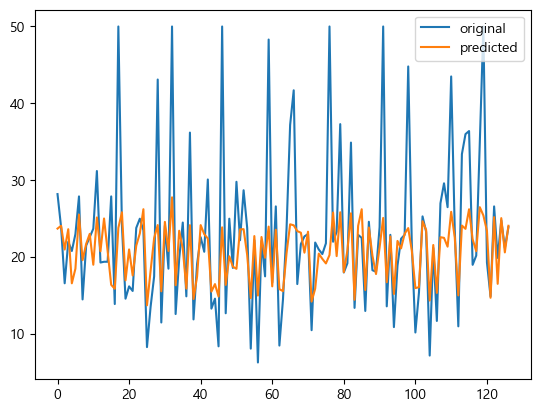

In [43]:
# 가우시안 함수 적용
svr_1 = SVR(kernel='rbf', C=1.0, gamma = 'auto')
# 모델 학습
svr_1.fit(X_train, y_train)
# 예측값 저장
pred = svr_1.predict(X_test)
# score구하기
print("score : ", svr.score(X_test, y_test))
# mse, rmse 구하기
print("MSE : ",  mean_squared_error(y_test, pred))
print("rmse1 : ", mean_squared_error(y_test, pred)**0.5)
print("rmse2 : ", mean_squared_error(y_test, pred, squared=False))
# y_test와 pred plot에 표현하기
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label='original')
plt.plot(x_ax, pred, label='predicted')
plt.legend()
plt.show()

In [44]:
kernel_list = ['linear', 'poly', 'rbf']

for kernel in kernel_list:
    svr = SVR(kernel=kernel, C=10, gamma='auto')
    svr.fit(X_train, y_train)
    
    pred = svr.predict(X_test)
    print("커널 : ", kernel)
    print("절편 : ", svr.intercept_)
    print("mse : ", mean_squared_error(y_test, pred))
    print("rmse : ", mean_squared_error(y_test, pred, squared=False))
    print("R2 : ", svr.score(X_test, y_test))
    print("")

커널 :  linear
절편 :  [21.7398755]
mse :  23.94077425384494
rmse :  4.8929310493654965
R2 :  0.7583167457140173

커널 :  poly
절편 :  [23.51099227]
mse :  70.51525323556505
rmse :  8.39733607970796
R2 :  0.28814516614747765

커널 :  rbf
절편 :  [26.57447519]
mse :  32.837789175825236
rmse :  5.730426613771896
R2 :  0.6685009570943234



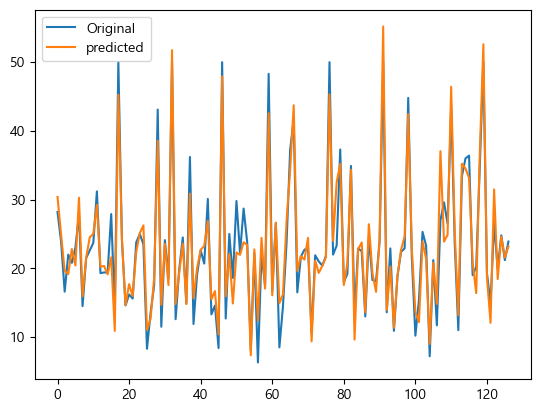

In [53]:
x_ax = range(len(y_test))

# svr = SVR(kernel='linear', C=0.01, gamma='auto')
svr = SVR(kernel='poly', C=100000, gamma='auto')
# svr = SVR(kernel='rbf', C=10000, gamma='auto')
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

plt.plot(x_ax, y_test, label = 'Original')
plt.plot(x_ax, pred, label='predicted')
plt.legend()
plt.show()